# Object Detection with Yolov3

![cover](https://bitmovin.com/wp-content/uploads/2019/08/Object_detection_Blog_Image_Q3_19.jpg)

Object detection is a computer vision task that involves both localizing one or more objects within an image and classifying each object in the image.

It is a challenging computer vision task that requires both successful object localization in order to locate and draw a bounding box around each object in an image, and object classification to predict the correct class of object that was localized.
Yolo is a faster object detection algorithm in computer vision and first described by Joseph Redmon, Santosh Divvala, Ross Girshick and Ali Farhadi in ['You Only Look Once: Unified, Real-Time Object Detection'](https://arxiv.org/abs/1506.02640)

This notebook implements an object detection based on a pre-trained model - [YOLOv3 Pre-trained Weights (yolov3.weights) (237 MB)](https://pjreddie.com/media/files/yolov3.weights). The model architecture is called a “DarkNet” and was originally loosely based on the VGG-16 model.


In [1]:
# Imports
import os

# This line changes tensorflow log level and suppresses warnings
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from src.utils import *

In [2]:
# Define the model
model = make_yolov3_model()

# Load the model weights
weight_reader = WeightReader("./model/yolov3.weights")

# Set model weights into the model
weight_reader.load_weights(model)

# save model to file
model.save("./model/model.h5")

c:\Users\kumar\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

loading weights of convolution #90
loading weights of convolution #91
loading weights of convolution #92
loading weights of convolution #93
no convolution #94
no convolution #95
loading weights of convolution #96
no convolution #97
no convolution #98
loading weights of convolution #99
loading weights of convolution #100
loading weights of convolution #101
loading weights of convolution #102
loading weights of convolution #103
loading weights of convolution #104
loading weights of convolution #105


In [3]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_0 (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_0             │ (None, None,      │        128 │ conv_0[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_0 (LeakyReLU) │ (None, None,      │          0 │ bnorm_0[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ leaky_0[0][0]     │
│ (ZeroPadding2D)     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_1 (Conv2D)     │ (None, None,      │     18,432 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_1             │ (None, None,      │        256 │ conv_1[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_1 (LeakyReLU) │ (None, None,      │          0 │ bnorm_1[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_2 (Conv2D)     │ (None, None,      │      2,048 │ leaky_1[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_2             │ (None, None,      │        128 │ conv_2[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_2 (LeakyReLU) │ (None, None,      │          0 │ bnorm_2[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_3 (Conv2D)     │ (None, None,      │     18,432 │ leaky_2[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_3             │ (None, None,      │        256 │ conv_3[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_3 (LeakyReLU) │ (None, None,      │          0 │ bnorm_3[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None,      │          0 │ leaky_1[0][0],    │
│                     │ None, 64)         │            │ leaky_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ add[0][0]         │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_5 (Conv2D)     │ (None, None,      │     73,728 │ zero_padding2d_1

 Total params: 62,001,757 (236.52 MB)

 Trainable params: 61,949,149 (236.32 MB)

 Non-trainable params: 52,608 (205.50 KB)

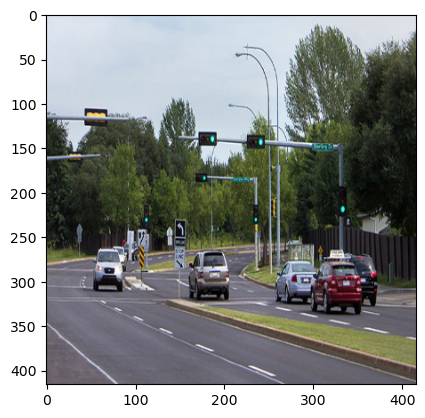

In [4]:
photo_filename = "./images/traffic.jpg"
_image, image_w, image_h = load_and_preprocess_image(
    photo_filename, [IMAGE_WIDTH, IMAGE_HEIGHT]
)
plt.imshow(_image)

In [5]:
image = np.expand_dims(_image, 0)
yhat = model.predict(image)
print([a.shape for a in yhat])

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [6]:
class BoundBox:
    """
    Objects of boxes. (xmin,ymin) represents the upleft coordinate of the box while (xmax,ymax) means downright one.
    """

    def __init__(self, xmin, ymin, xmax, ymax, objness=None, classes=None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        self.objness = objness
        self.classes = classes
        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)

        return self.label

    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]

        return self.score


def _sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def decode_netout(netout, anchors, net_h, net_w):
    grid_h, grid_w = netout.shape[:2]
    nb_box = 3
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = netout.shape[-1] - 5
    boxes = []
    netout[..., :2] = _sigmoid(netout[..., :2])
    netout[..., 4:] = _sigmoid(netout[..., 4:])
    netout[..., 5:] = netout[..., 4][..., np.newaxis] * netout[..., 5:]

    for i in range(grid_h * grid_w):
        row = i / grid_w
        col = i % grid_w
        for b in range(nb_box):
            # 4th element is objectness score
            objectness = netout[int(row)][int(col)][b][4]
            # if(objectness.all() <= obj_thresh): continue
            # first 4 elements are x, y, w, and h
            x, y, w, h = netout[int(row)][int(col)][b][:4]
            x = (col + x) / grid_w  # center position, unit: image width
            y = (row + y) / grid_h  # center position, unit: image height
            w = anchors[2 * b + 0] * np.exp(w) / net_w  # unit: image width
            h = anchors[2 * b + 1] * np.exp(h) / net_h  # unit: image height
            # last elements are class probabilities
            classes = netout[int(row)][col][b][5:]
            box = BoundBox(
                x - w / 2, y - h / 2, x + w / 2, y + h / 2, objectness, classes
            )
            boxes.append(box)
    return boxes

In [7]:
anchors = [
    [116, 90, 156, 198, 373, 326],
    [30, 61, 62, 45, 59, 119],
    [10, 13, 16, 30, 33, 23],
]
boxes = list()


for i in range(len(yhat)):

    boxes += decode_netout(
        yhat[i][0], anchors[i], net_h=IMAGE_HEIGHT, net_w=IMAGE_WIDTH
    )


for i in range(len(boxes)):

    x_offset, x_scale = (IMAGE_WIDTH - IMAGE_WIDTH) / 2.0 / IMAGE_HEIGHT, float(
        IMAGE_WIDTH
    ) / IMAGE_WIDTH

    y_offset, y_scale = (IMAGE_HEIGHT - IMAGE_HEIGHT) / 2.0 / IMAGE_HEIGHT, float(
        IMAGE_HEIGHT
    ) / IMAGE_HEIGHT

    boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)

    boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)

    boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)

    boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

In [8]:
len(boxes)

10647

In [9]:
def box_filter(boxes, labels, threshold_socre):
    valid_boxes = []
    valid_labels = []
    valid_scores = []
    for box in boxes:
        for i in range(len(labels)):
            if box.classes[i] > threshold_socre:
                valid_boxes.append(box)
                valid_labels.append(labels[i])
                valid_scores.append(box.classes[i])

    return (valid_boxes, valid_labels, valid_scores)

In [10]:
valid_data = box_filter(boxes, labels, threshold_socre=0.6)

In [11]:
def draw_boxes(filename, valid_data):

    data = pyplot.imread(filename)
    pyplot.imshow(data)
    ax = pyplot.gca()
    for i in range(len(valid_data[0])):
        box = valid_data[0][i]
        y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
        width, height = x2 - x1, y2 - y1
        rect = Rectangle((x1, y1), width, height, fill=False, color="white")
        ax.add_patch(rect)
        print(valid_data[1][i], valid_data[2][i])
        label = "%s (%.3f)" % (valid_data[1][i], valid_data[2][i])
        pyplot.text(x1, y1, label, color="white")
    pyplot.show()

car 0.9799808
car 0.90150255
car 0.9822434
car 0.8228119
car 0.9342798
car 0.9315793
car 0.98184437
car 0.9982241
car 0.98154813
car 0.9050933
car 0.7668625
car 0.98158294
car 0.92317045
car 0.65974
car 0.9845722
car 0.98843783
car 0.8808287
traffic light 0.618828
traffic light 0.7597198
traffic light 0.7020066
traffic light 0.8713706
traffic light 0.964606
traffic light 0.77623147
traffic light 0.8328067
car 0.6020883
car 0.7852914


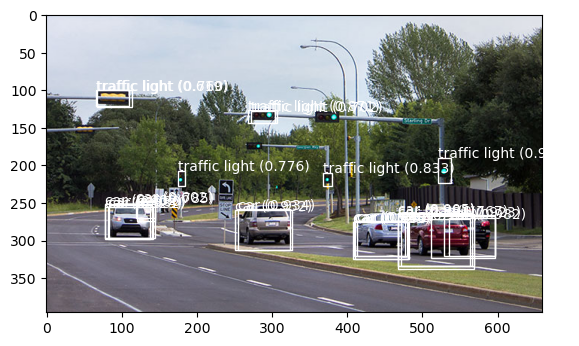

In [12]:
draw_boxes(photo_filename, valid_data)

In [13]:
def encoder_dic(valid_data):
    data_dic = {}
    (valid_boxes, valid_labels, valid_scores) = valid_data
    for box, label, score in zip(valid_boxes, valid_labels, valid_scores):
        if label not in data_dic:
            data_dic[label] = [[score, box, "kept"]]
        else:
            data_dic[label].append([score, box, "kept"])

    return data_dic


dic = encoder_dic(valid_data)

In [14]:
def decode_box_coor(box):
    return (box.xmin, box.ymin, box.xmax, box.ymax)


def iou(box1, box2):
    (box1_x1, box1_y1, box1_x2, box1_y2) = decode_box_coor(box1)
    (box2_x1, box2_y1, box2_x2, box2_y2) = decode_box_coor(box2)

    xi1 = max(box1_x1, box2_x1)
    yi1 = max(box1_y1, box2_y1)
    xi2 = min(box1_x2, box2_x2)
    yi2 = min(box1_y2, box2_y2)
    inter_width = xi2 - xi1
    inter_height = yi2 - yi1
    inter_area = max(inter_height, 0) * max(inter_width, 0)

    box1_area = (box1_x2 - box1_x1) * (box1_y2 - box1_y1)
    box2_area = (box2_x2 - box2_x1) * (box2_y2 - box2_y1)
    union_area = box1_area + box2_area - inter_area

    iou = inter_area / union_area

    return iou


def do_nms(data_dic, nms_thresh):
    final_boxes, final_scores, final_labels = list(), list(), list()
    for label in data_dic:
        scores_boxes = sorted(data_dic[label], reverse=True)
        for i in range(len(scores_boxes)):
            if scores_boxes[i][2] == "removed":
                continue
            for j in range(i + 1, len(scores_boxes)):
                if iou(scores_boxes[i][1], scores_boxes[j][1]) >= nms_thresh:
                    scores_boxes[j][2] = "removed"

        for e in scores_boxes:
            print(label + " " + str(e[0]) + " status: " + e[2])
            if e[2] == "kept":
                final_boxes.append(e[1])
                final_labels.append(label)
                final_scores.append(e[0])

    return (final_boxes, final_labels, final_scores)

In [15]:
final_data = do_nms(dic, 0.7)

car 0.9982241 status: kept
car 0.98843783 status: kept
car 0.9845722 status: removed
car 0.9822434 status: kept
car 0.98184437 status: removed
car 0.98158294 status: kept
car 0.98154813 status: removed
car 0.9799808 status: removed
car 0.9342798 status: kept
car 0.9315793 status: removed
car 0.92317045 status: removed
car 0.9050933 status: removed
car 0.90150255 status: removed
car 0.8808287 status: removed
car 0.8228119 status: removed
car 0.7852914 status: kept
car 0.7668625 status: kept
car 0.65974 status: removed
car 0.6020883 status: removed
traffic light 0.964606 status: kept
traffic light 0.8713706 status: kept
traffic light 0.8328067 status: kept
traffic light 0.77623147 status: kept
traffic light 0.7597198 status: kept
traffic light 0.7020066 status: removed
traffic light 0.618828 status: removed


car 0.9982241
car 0.98843783
car 0.9822434
car 0.98158294
car 0.9342798
car 0.7852914
car 0.7668625
traffic light 0.964606
traffic light 0.8713706
traffic light 0.8328067
traffic light 0.77623147
traffic light 0.7597198


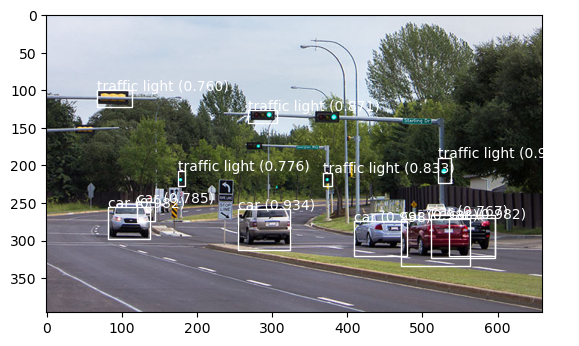

In [16]:
draw_boxes(photo_filename, final_data)

In [17]:
def yolo_non_max_suppression(scores, boxes, classes, max_boxes=10, iou_threshold=0.5):

    max_boxes_tensor = K.variable(
        max_boxes, dtype="int32"
    )  # tensor to be used in tf.image.non_max_suppression()
    K.get_session().run(
        tf.variables_initializer([max_boxes_tensor])
    )  # initialize variable max_boxes_tensor
    nms_indices = tf.image.non_max_suppression(
        scores=scores,
        boxes=boxes,
        max_output_size=max_boxes,
        iou_threshold=iou_threshold,
    )

    scores = K.gather(scores, nms_indices)
    boxes = K.gather(boxes, nms_indices)
    classes = K.gather(classes, nms_indices)

    return scores, boxes, classes

In [18]:
def showresults(path):
    _image, width, height = load_and_preprocess_image(path, [IMAGE_WIDTH, IMAGE_HEIGHT])
    image = np.expand_dims(_image, 0)
    yhat = model.predict(image)
    boxes = list()
    for j in range(len(yhat)):
        boxes += decode_netout(
            yhat[j][0], anchors[j], net_h=IMAGE_HEIGHT, net_w=IMAGE_WIDTH
        )
    for i in range(len(boxes)):
        x_offset, x_scale = (IMAGE_WIDTH - IMAGE_WIDTH) / 2.0 / IMAGE_HEIGHT, float(
            IMAGE_WIDTH
        ) / IMAGE_WIDTH
        y_offset, y_scale = (IMAGE_HEIGHT - IMAGE_HEIGHT) / 2.0 / IMAGE_HEIGHT, float(
            IMAGE_HEIGHT
        ) / IMAGE_HEIGHT
        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)
    valid_data = box_filter(boxes, labels, threshold_socre=0.6)
    dic = encoder_dic(valid_data)
    final_data = do_nms(dic, 0.7)
    draw_boxes(path, final_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
zebra 0.998504 status: kept
zebra 0.9980972 status: removed
zebra 0.99749166 status: removed
zebra 0.99720347 status: removed
zebra 0.97361493 status: kept
zebra 0.9625325 status: kept
zebra 0.9492127 status: kept
zebra 0.94795907 status: removed
zebra 0.92289144 status: kept
zebra 0.887562 status: removed
zebra 0.75877285 status: removed
zebra 0.71294904 status: removed
zebra 0.66869533 status: removed
zebra 0.998504
zebra 0.97361493
zebra 0.9625325
zebra 0.9492127
zebra 0.92289144


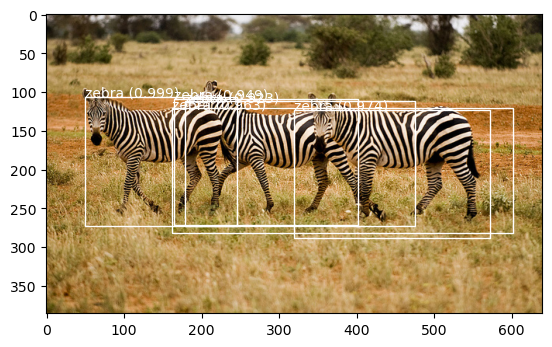

In [19]:
showresults("./images/zebra.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
horse 0.9981355 status: kept
horse 0.9928219 status: removed
horse 0.9498802 status: removed
horse 0.88797075 status: removed
horse 0.7980076 status: removed
horse 0.7887686 status: removed
horse 0.63089937 status: removed
horse 0.9981355


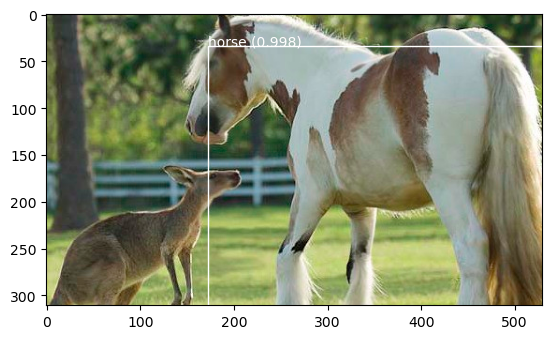

In [20]:
showresults("./images/kangaroo.png")